# Titanic Dataset

In this dataset we are building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
#Display head
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Display tail
data_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Display Sample
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.75,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.05,NaN,S


In [6]:
#Display shape
data_train.shape

(891, 12)

In [7]:
#Display columns
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

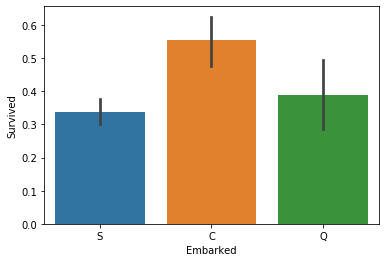

In [8]:
# Bar plot
sns.barplot(x="Embarked", y="Survived", data=data_train);

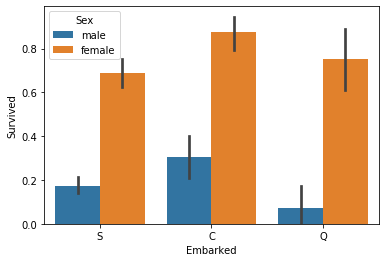

In [9]:
# Bar plot
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

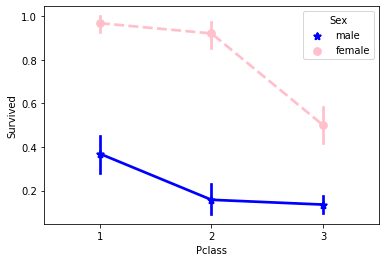

In [10]:
# Point plot
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [11]:
#Check missing values
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Data transformation
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df
def impute_embarked(df):
    df.Embarked = df.Embarked.fillna('C')
    return df
def impute_SibSp(df):
    df.SibSp = df.SibSp + df.Parch + 1
    return df
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df   
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Parch'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = impute_embarked(df)
    df = impute_SibSp(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,male,Student,2,1_quartile,N,S,"Braund,",Mr.
1,2,1,1,female,Adult,2,4_quartile,C,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,1,1_quartile,N,S,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,2,4_quartile,C,S,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,1,2_quartile,N,S,"Allen,",Mr.


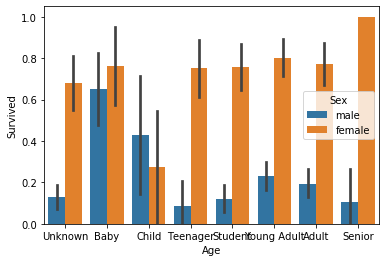

In [13]:
# Bar plot
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

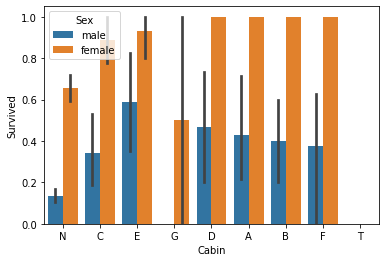

In [14]:
# Bar plot
sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train);

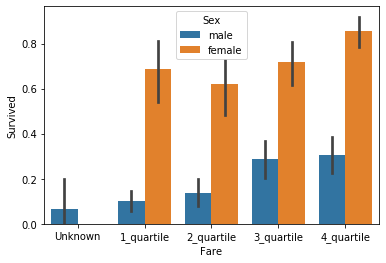

In [15]:
# Bar plot
sns.barplot(x="Fare", y="Survived", hue="Sex", data=data_train);

In [16]:
# Feature encoding
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix', 'Embarked']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,1,4,2,0,7,2,100,19
1,2,1,1,0,0,2,3,2,0,182,20
2,3,1,3,0,7,1,0,7,2,329,16
3,4,1,1,0,7,2,3,2,2,267,20
4,5,0,3,1,7,1,1,7,2,15,19


In [17]:
# Split train & validation data
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [18]:
# Fitting & Tuning an algo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Prediction on validation data
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8171641791044776


In [20]:
# Predict the Actual Test Data
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# KFold cross-validation
#from sklearn.cross_validation import KFold

#def run_kfold(clf):
    #kf = KFold(891, n_folds=5)
    #outcomes = []
    #fold = 0
    #for train_index, test_index in kf:
        #fold += 1
        #X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        #y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        #clf.fit(X_train, y_train)
        #predictions = clf.predict(X_test)
        #accuracy = accuracy_score(y_test, predictions)
        #outcomes.append(accuracy)
        #print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    #mean_outcome = np.mean(outcomes)
    #print("Mean Accuracy: {0}".format(mean_outcome)) 

#run_kfold(clf)